In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving medical_examination.csv to medical_examination.csv


In [3]:
df = pd.read_csv('medical_examination.csv')

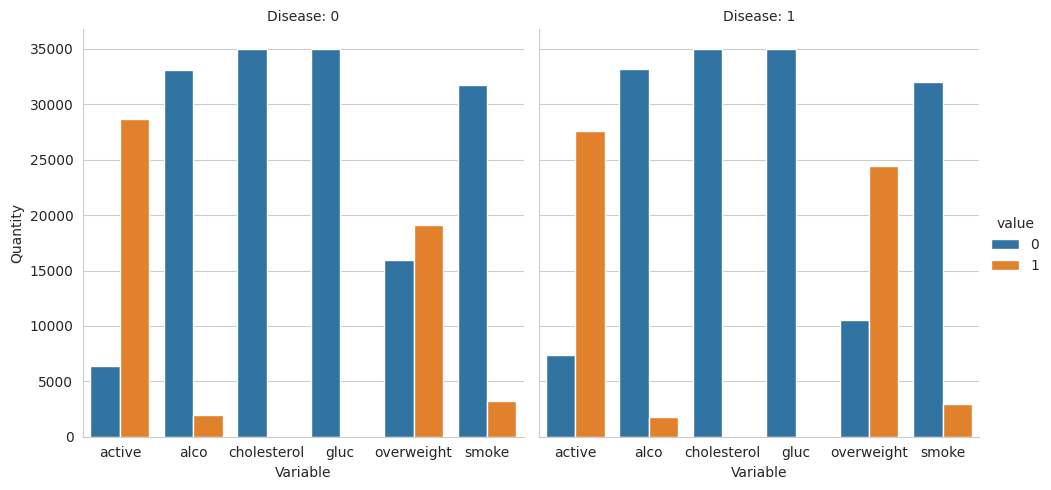

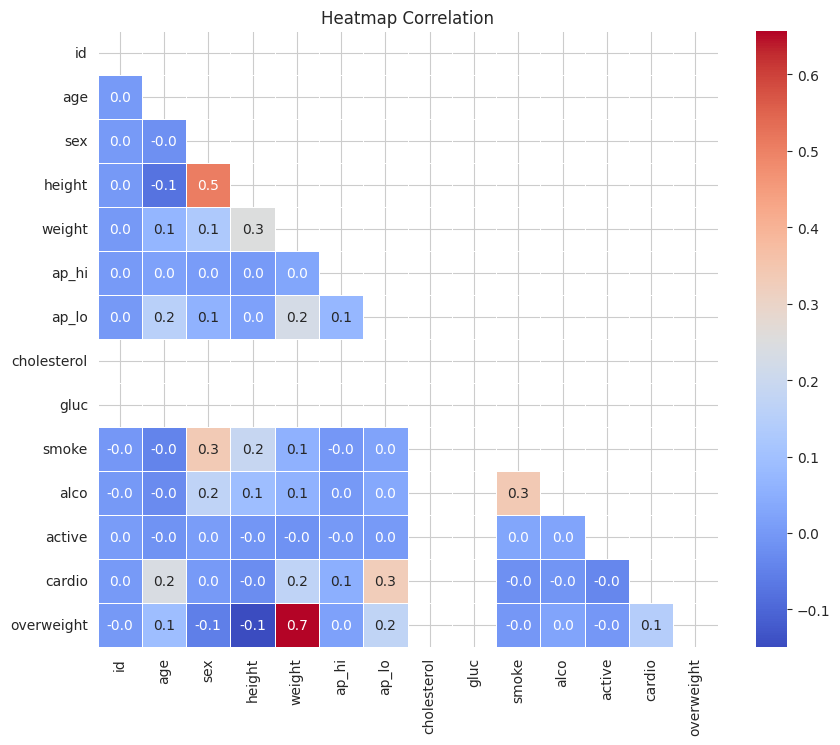

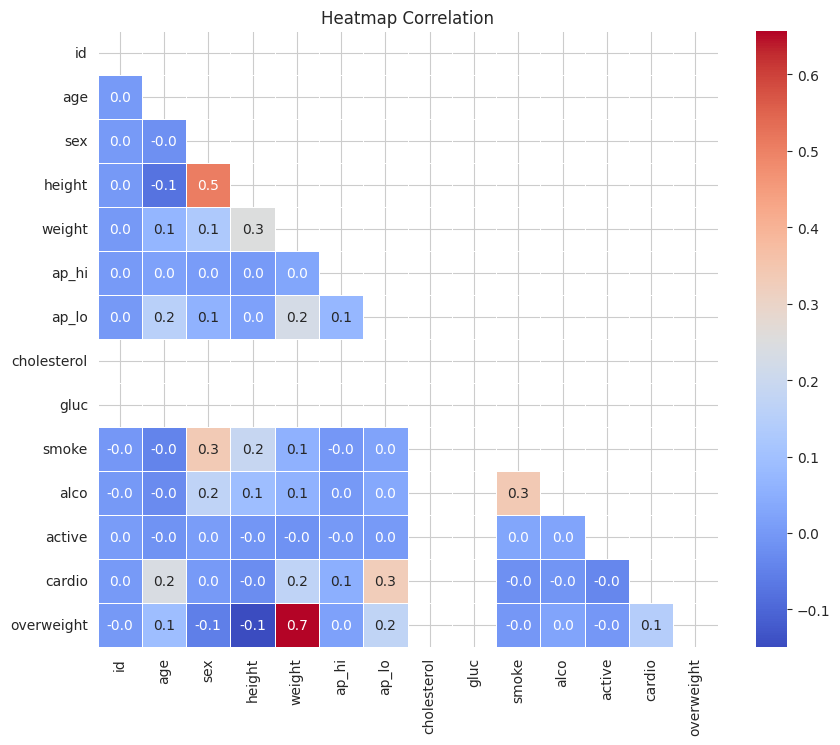

In [12]:
df['overweight'] = ((df['weight'] / (df['height'] / 100) ** 2) > 25).astype(int)
df['cholesterol']=(df['cholesterol']>1).astype(int)
df['gluc']=(df['gluc']>1).astype(int)

def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke','alco','active','overweight'])
    df_cat = df.melt(id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    sns.set_style("whitegrid")
    g = sns.catplot(x='variable', y='total', hue='value', col='cardio', data = df_cat, kind='bar', height=5, aspect=1)
    g.set_axis_labels("Variable", "Quantity")
    g.set_titles("Disease: {col_name}")

    fig = g.figure

    fig.savefig('catplot.png')
    return fig

def draw_heat_map():

    df_heat = df[(df['ap_lo']<= df['ap_hi']) & (df['height']>=df['height'].quantile(0.025)) & (df['height']<=df['height'].quantile(0.975)) & (df['weight']>= df['weight'].quantile(0.025)) & (df['weight']<= df['weight'].quantile(0.975))]

    corr = df_heat.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(10,8))

    sns.heatmap(corr, mask = mask, annot=True, fmt=".1f", linewidths=.5, cmap = 'coolwarm', ax = ax)
    ax.set_title("Heatmap Correlation")

    fig.savefig('heatmap.png')
    plt.show()
    return fig

draw_cat_plot()
draw_heat_map()